Problem Statement:
You are the Data Scientist at a telecom company “Leo” whose customers are churning out to its
competitors. You have to analyse the data of your company and find insights and stop your customers from
churning out to other telecom companies. 

Domain Context –
Customer churn, in simple terms means that the customer has stopped doing business with the company
and this is a common problem when it comes to telecom industries. To avoid this, companies use predictive
analysis to gauge the factors responsible for a customer to leave the company. These churn prediction
models help in finding out the customer base that are most likely to churn out


Tasks to be done:
A) Data Manipulation:
a. Find the total number of male customers
b. Find the total number of customers whose Internet Service is ‘DSL’
c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the
result in ‘new_customer’
d. Extract all those customers whose tenure is less than 10 months or their Total charges is less
than 500$ & store the result in ‘new_customer’

B) Data Visualization:
a. Build a pie-chart to show the distribution of customers would be churning out
b. Build a bar-plot to show the distribution of ‘Internet Service’

C) Model Building:
a. Build a sequential model using Keras, to find out if the customerwouldchurn or not, using
‘tenure’ as the feature and ‘Churn’ as the dependent/target column:
i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
iii. Use ‘Adam’ as the optimization algorithm
iv. Fit the model on the train set, with number of epochs to be 150
v. Predict the values on the test set and build a confusion matrix
vi. Plot the ‘Accuracy vs Epochs’ graph

b. Build the 2nd model using same target and feature variables:
i. Add a drop-out layer after the input layer with drop-out value of 0.3
ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2
iii. Predict the values on the test set and build a confusion matrix
iv. Plot the ‘Accuracy vs Epochs’ graph

c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and
‘Churn’ as the dependent/target column:
i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
iii. Use ‘Adam’ as the optimization algorithm
iv. Fit the model on the train set, with number of epochs to be 150
v. Predict the values on the test set and build a confusion matrix
vi. Plot the ‘Accuracy vs Epochs’ graph

In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("customer_churn_ai.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [21]:
# A) Data Manipulation:
# a. Find the total number of male customers 
sum(df['gender']=="Male") 

3555

In [22]:
# b. Find the total number of customers whose Internet Service is ‘DSL’
sum(df['InternetService']=="DSL")


2421

In [23]:
# c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’
new_customer=df[(df['gender']=='Female') & 
(df['SeniorCitizen']==1) & (df['PaymentMethod']=='Mailed check')] 
new_customer.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No


In [24]:
# d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_customer’
import pandas as pd

# Assuming df is your DataFrame
# Convert 'TotalCharges' to numeric, coerce errors to NaN for non-convertible values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Extract new customers
new_customer = df[(df['tenure'] < 10) | (df['TotalCharges'] < 500)]

# Display the first few rows of the new_customer DataFrame
new_customer.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


In [25]:
#B) Data Visualization:
# a. Build a pie-chart to show the distribution of customers would be churning out
names = df["Churn"].value_counts().keys().tolist() 
sizes= df["Churn"].value_counts().tolist()
names
sizes

[5174, 1869]

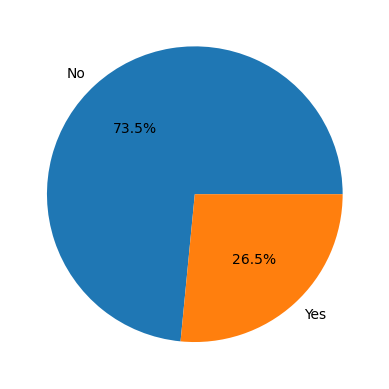

In [27]:
#b. Build a bar-plot to show the distribution of ‘Internet Service’
plt.pie(sizes,labels=names,autopct="%0.1f%%") 
plt.show() 

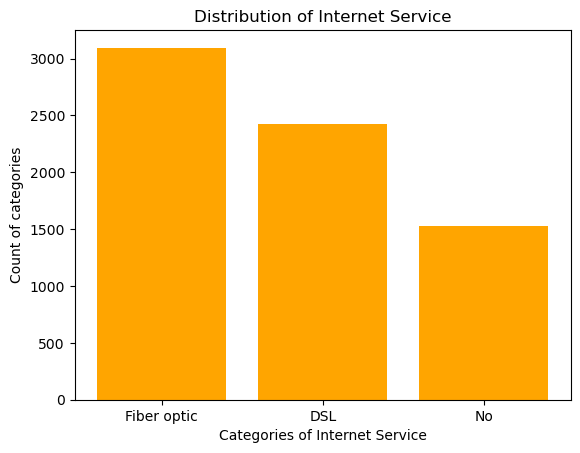

In [28]:
plt.bar(df['InternetService'].value_counts().keys().tolist(),df['InternetService'].value_counts().tolist(),color='orange')
# We are creating the bar-plot using plt.bar()
plt.xlabel('Categories of Internet Service') 
plt.ylabel('Count of categories')
plt.title('Distribution of Internet Service') 
plt.show()                                                                            

In [30]:
# C) Model Building:
# a. Build a sequential model using Keras, to find out if the customerwouldchurn or not, using ‘tenure’ as the feature and ‘Churn’ as the dependent/target column
x=df[['tenure']] 
y=df[['Churn']]
# We are starting off by extracting the target and feature columns
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)


In [32]:
from keras.models import Sequential


In [45]:
from keras.models import Sequential 
from keras.layers import Dense 
model = Sequential() 
model.add(Dense(12, input_dim=1, activation='relu')) 
model.add(Dense(8, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 

After that we create an instance of a sequential model by using Sequential(). 
Going ahead we will add the input layer to our model. This input layer would comprise of 
12 nodes and would have ‘relu’ as the activation function. After that we’ll add a hidden 
layer with 8 nodes and ‘relu’ as activation function. Finally, we’ll add the output layer which 
would comprise of just one node and ‘sigmoid’ as activation function. 
We are using ‘sigmoid’ here because this is a binary classification problem and ‘sigmoid’ 
gives us a probability between 0 & 1. 

In [46]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

Further, we’ll tune the model. Here, we are using ‘binary_crossentropy’ as our loss function 
because this is a binary classification problem. 
Optimizer used is ‘adam’ and we would want to calculate the accuracy.

In [47]:
model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test)) 

Epoch 1/150


UnimplementedError: Graph execution error:

Detected at node 'binary_crossentropy/Cast' defined at (most recent call last):
    File "C:\Users\91801\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\91801\anaconda3\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\91801\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\91801\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\91801\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\91801\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\91801\anaconda3\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\91801\anaconda3\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "C:\Users\91801\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\91801\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\91801\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\91801\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\91801\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\91801\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\91801\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\91801\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "C:\Users\91801\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "C:\Users\91801\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\91801\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\91801\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\91801\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\91801\AppData\Local\Temp\ipykernel_27756\795396598.py", line 1, in <module>
      model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test))
    File "C:\Users\91801\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\91801\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\91801\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "C:\Users\91801\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\91801\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "C:\Users\91801\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\91801\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
      return self.compiled_loss(
    File "C:\Users\91801\anaconda3\lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\91801\anaconda3\lib\site-packages\keras\src\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\91801\anaconda3\lib\site-packages\keras\src\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\91801\anaconda3\lib\site-packages\keras\src\losses.py", line 2421, in binary_crossentropy
      y_true = tf.cast(y_true, y_pred.dtype)
Node: 'binary_crossentropy/Cast'
Cast string to float is not supported
	 [[{{node binary_crossentropy/Cast}}]] [Op:__inference_train_function_1389]

Going ahead, we will fit the model on the train set and evaluate it on top of the test set. The 
number of epochs given over here is 150. 


This gives us a final validation accuracy of 75.64%. But this is not the average accuracy 
across 150 epochs, so let’s also find that: 


In [39]:
mport numpy as np 
np.mean(model.history.history['val_acc'])

ValueError: invalid literal for int() with base 10: 'No'

In [ ]:
# So, the mean accuracy comes out to be 75.62%

In [ ]:
y_pred=model.predict_classes(x_test) 
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test,y_pred) 

Further, we will, predict the values on ‘x_test’ and build a confusion matrix with the actual 
values and the predicted values.

In [ ]:
rom matplotlib import pyplot as plt 
plt.plot(model.history.history['acc']) 
plt.plot(model.history.history['val_acc']) 
plt.show()

In [ ]:
#Finally, we will make the ‘Accuracy vs Epochs’ plot:

In [40]:
# C.) b.)
model = Sequential() 
model.add(Dense(12, input_dim=1, activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(8, activation='relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(1, activation='sigmoid')) 

ValueError: could not broadcast input array from shape (4930,1) into shape (4930,)

Now, we are building our 2nd model, where we are adding a drop-out layer after the input 
layer and the hidden layer. 
Drop-out value of 0.3 means that 70% of the nodes in the input layer will be dropped out. 
Drop-out value of 0.2 means that 80% of the nodes in the hidden layer will be dropped out. 

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test)) 
y_pred = model.predict_classes(x_test) 
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test,y_pred)

In [ ]:
rom matplotlib import pyplot as plt 
plt.plot(model.history.history['acc']) 
plt.plot(model.history.history['val_acc']) 
plt.show()

In [ ]:
#After this, we have fit the model and predicted the values. 
#So, we see that the 2nd model gives us a final validation accuracy of 73.41%. Now, let’s calculate the mean validation accuracy across 150 epochs:

In [ ]:
import numpy as np 
np.mean(model.history.history['val_acc']) 

So, the mean accuracy comes out to be 73.42%. 

By looking at this graph, we can infer that the validation accuracy is constantly 73.41%. 
Now, this tells us that something is wrong with our model. 
The most probable explanation for this is the drop-out percentage is very high for the input 
layer and the hidden layer and thus the model which we have built might be underfitting 
the data. 

In [ ]:
# c.) 
x=customer[['MonthlyCharges','tenure','TotalCharges']]#Features 
y=customer[['Churn']]#Target 

This time, we are taking ‘Monthly Charges’, ‘Total Charges’ and ‘Tenure’ as the features 
and ‘Churn’ as the target.

In [43]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42) 
model = Sequential() 
model.add(Dense(12, input_dim=3, activation='relu')) 
model.add(Dense(8, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test)) 
y_pred = model.predict_classes(x_test) 
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test,y_pred) 
from matplotlib import pyplot as plt 
plt.plot(model.history.history['acc']) 
plt.plot(model.history.history['val_acc']) 
plt.show() 

KeyError: 'val_acc'

After this, we divide the data into train and test sets and build the model on train test and 
predict the values on the test set. 

So, we see that we get a final validation accuracy of 78.58%. 
But, when we look at this graph, we see that there is a constant fluctuation in the validation 
accuracy. 
So, let’s find out the mean validation accuracy across 150 epochs:


In [ ]:
import numpy as np 
np.mean(model.history.history['val_acc']) 

And this gives a mean validation accuracy of 74.24% 

Conclusion: 
The first model gave us a mean validation accuracy of 75.62%, the second model had accuracy 
of 73.42 and the third model had a mean validation accuracy of 74.24%. 
The second model gave us the least accuracy because we added two dropout layers with high 
probabilities of dropout. 
Now, there could be many factors why third model’s accuracy was less than that of first model. 
Most probably one or more of the features used during the model building could be of less 
significance leading to the reduction in accuracy. 
It should also be kept in mind that these accuracy values are very specific to the 
hyperparameters used during the model building process such as optimizers, activation 
functions and number of epochs. If we were to tweak these hyperparameters we would get 
completely different accuracy values for all the three models.